# Final Exam

## Question 1 
Define a function `insert_block` to insert a block of values in a matrix,

```julia
A = fill(0, 9, 9)
insert_block(A, 3, 5, 2)
```

so that the above code would yield:

`9×9 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  2  2  2  0  0
 0  0  0  0  2  2  2  0  0
 0  0  0  0  2  2  2  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0`

In [23]:
function insert_block(A,row,col,value)
 #   for i = row:row+2
 #       for j = col:col+2
    A[row:row+2,col:col+2].=value
#        end
#    end
    return A
end

insert_block (generic function with 1 method)

In [24]:
A = fill(0, 9, 9)
insert_block(A, 3, 5, 2)


9×9 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  2  2  2  0  0
 0  0  0  0  2  2  2  0  0
 0  0  0  0  2  2  2  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0

## Question 2

### Create a Caesar ciphers

A caesar cipher is an encryption scheme that shifts all letters in the alphabet by some specified offset to other letters in the alphabet.

For example, a shift of 1 would turn the letter "A" into the letter "B" and the letter "M" to the letter "N".

### Goal

We want to add a method to the `+` operator such that we can add together a string and an integer shift to encrypt a message. For example,

```julia
4 + "hello" == "lipps"
```

### Test it out

Once you think you have it working, try to decrypt the following string by adding a shift of -7.
```julia
"Kv'uv{'tlkksl'pu'{ol'hmmhpyz'vm'kyhnvuz'mvy'\u80v|'hyl'jy|ujo\u80'huk'{hz{l'nvvk'~p{o'rl{jo|w5"
```

## Below is the step by step guide to solve the Caesar ciphers problem

### Step 1

First, we want a way to convert between characters and integers. Actually, under the hood, all of our characters are being represented as numbers via their *ASCII representation*.

You can start to get a feel for how this works by running the following lines of code.

```julia
convert(Int, 'a')
convert(Int, 'b')
convert(Char, 97)
convert(Char, 98)
```

In [18]:
@show convert(Int, 'a')
@show convert(Int, 'b')
@show convert(Char, 97)
@show convert(Char, 98)

convert(Int, 'a') = 97
convert(Int, 'b') = 98
convert(Char, 97) = 'a'
convert(Char, 98) = 'b'


'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)

What happens when you try to add an integer to a character? (Note that the difference between `Char`s and `String`s is important here!)

In [38]:
@show convert(Int, 'a'+1)

convert(Int, 'a' + 1) = 98


98

When we treat a string elementwise, what is the type of (`typeof`) each element?

In [41]:
a="victorqq"
typeof(a[1])
#convert(Int,a[:])
'a'+1

'b': ASCII/Unicode U+0062 (category Ll: Letter, lowercase)

### Step 2
Try to write a function called `caesar(shift, stringin)` that encodes its input string, `stringin`, by shifting all letters in the alphabet by `shift`.

One way to do this is to use the `map` or `broadcast` function!

In [39]:
caesar(shift, stringin)=map(x -> x + shift, stringin)

caesar (generic function with 1 method)

In [40]:
caesar(-4, "lipps")

"hello"

If you think you have this working, try out
```julia
caesar(-4, "lipps")
```

### Step 3
We want to extend the `+` operator to include a way to apply this cipher.

The `+` operator lives in a place called "Base". Everything that lives in Base is accessible to us as users by default, but we need a special incantation to modify the things that live in Base. If we want to modify `+`, our incantation is

```julia
import Base: +
```
To perform string addition, write a method for `+` like this

+(x::String, y::String) = string(x, y)

In [44]:
?string

search: string String StringIndexError Cstring Cwstring bitstring SubString



```
string(n::Integer; base::Integer = 10, pad::Integer = 1)
```

Convert an integer `n` to a string in the given `base`, optionally specifying a number of digits to pad to.

```jldoctest
julia> string(5, base = 13, pad = 4)
"0005"

julia> string(13, base = 5, pad = 4)
"0023"
```

---

```
string(xs...)
```

Create a string from any values, except `nothing`, using the [`print`](@ref) function.

`string` should usually not be defined directly. Instead, define a method `print(io::IO, x::MyType)`. If `string(x)` for a certain type needs to be highly efficient, then it may make sense to add a method to `string` and define `print(io::IO, x::MyType) = print(io, string(x))` to ensure the functions are consistent.

# Examples

```jldoctest
julia> string("a", 1, true)
"a1true"
```


In [43]:
import Base:+
+(x::String, y::String) = string(x, y)

+ (generic function with 167 methods)

And now that you've extended `+` once, let's add another method for `+` that calls the `caesar` function we've written.

In [45]:
+(shift::Int, stringin::String)=caesar(shift, stringin)

+ (generic function with 168 methods)

Test your final answer.

In [46]:
+(-4, "lipps")

"hello"

## Question 3

Download the `test.csv` file from moddle. This data has passenger details of train travellers. Read the data and tidy it (handle the missing values). Calculate the average age for Male passengers and Female passengers.

In [49]:
readdir()

4-element Array{String,1}:
 ".ipynb_checkpoints"
 "Final_exam_summer_2020.ipynb"
 "RestaurantData.zip"
 "test.csv"

In [50]:
using CSV
P = CSV.read("test.csv", header=true)


,PassengerId,Pclass,Name,Sex
,Int64,Int64,String,String
1,892,3,"Kelly, Mr. James",male
2,893,3,"Wilkes, Mrs. James (Ellen Needs)",female
3,894,2,"Myles, Mr. Thomas Francis",male
4,895,3,"Wirz, Mr. Albert",male
5,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female
6,897,3,"Svensson, Mr. Johan Cervin",male
7,898,3,"Connolly, Miss. Kate",female
8,899,2,"Caldwell, Mr. Albert Francis",male
9,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female


In [68]:
P.Age

418-element CSV.Column{Union{Missing, Float64},Union{Missing, Float64}}:
 34.5
 47.0
 62.0
 27.0
 22.0
 14.0
 30.0
 26.0
 18.0
 21.0
   missing
 46.0
 23.0
  ⋮
 23.0
 50.0
   missing
  3.0
   missing
 37.0
 28.0
   missing
 39.0
 38.5
   missing
   missing

In [72]:
using StatsBase
using DataFrames
describe(P,:nmissing)


,variable,nmissing
,Symbol,Union…
1,PassengerId,
2,Pclass,
3,Name,
4,Sex,
5,Age,86
6,SibSp,
7,Parch,
8,Ticket,
9,Fare,1


In [76]:
cleanP=dropmissing(P);
describe(cleanP,:nmissing)

,variable,nmissing
,Symbol,Nothing
1,PassengerId,
2,Pclass,
3,Name,
4,Sex,
5,Age,
6,SibSp,
7,Parch,
8,Ticket,
9,Fare,


In [83]:
?describe

search: describe



```
describe(io::IO, x)
```

For an object `x`, print descriptive statistics to `io`.

This generic function is owned by StatsBase.jl, which is the sole provider of the default definition.

---

```
describe(df::AbstractDataFrame; cols=:)
describe(df::AbstractDataFrame, stats::Union{Symbol, Pair}...; cols=:)
```

Return descriptive statistics for a data frame as a new `DataFrame` where each row represents a variable and each column a summary statistic.

# Arguments

  * `df` : the `AbstractDataFrame`
  * `stats::Union{Symbol, Pair}...` : the summary statistics to report. Arguments can be:

      * A symbol from the list `:mean`, `:std`, `:min`, `:q25`, `:median`, `:q75`, `:max`, `:eltype`, `:nunique`, `:first`, `:last`, and `:nmissing`. The default statistics used are `:mean`, `:min`, `:median`, `:max`, `:nunique`, `:nmissing`, and `:eltype`.
      * `:all` as the only `Symbol` argument to return all statistics.
      * A `name => function` pair where `name` is a `Symbol` or string. This will create a column of summary statistics with the provided name.
  * `cols` : a keyword argument allowing to select only a subset of columns from `df` to describe. Can be any column selector (`Symbol`, string or integer; `:`, `All`, `Between`, `Not`, a regular expression, or a vector of `Symbol`s, strings or integers).

# Details

For `Real` columns, compute the mean, standard deviation, minimum, first quantile, median, third quantile, and maximum. If a column does not derive from `Real`, `describe` will attempt to calculate all statistics, using `nothing` as a fall-back in the case of an error.

When `stats` contains `:nunique`, `describe` will report the number of unique values in a column. If a column's base type derives from `Real`, `:nunique` will return `nothing`s.

Missing values are filtered in the calculation of all statistics, however the column `:nmissing` will report the number of missing values of that variable. If the column does not allow missing values, `nothing` is returned. Consequently, `nmissing = 0` indicates that the column allows missing values, but does not currently contain any.

If custom functions are provided, they are called repeatedly with the vector corresponding to each column as the only argument. For columns allowing for missing values, the vector is wrapped in a call to `skipmissing`: custom functions must therefore support such objects (and not only vectors), and cannot access missing values.

# Examples

```julia
julia> df = DataFrame(i=1:10, x=0.1:0.1:1.0, y='a':'j')
10×3 DataFrame
│ Row │ i     │ x       │ y    │
│     │ Int64 │ Float64 │ Char │
├─────┼───────┼─────────┼──────┤
│ 1   │ 1     │ 0.1     │ 'a'  │
│ 2   │ 2     │ 0.2     │ 'b'  │
│ 3   │ 3     │ 0.3     │ 'c'  │
│ 4   │ 4     │ 0.4     │ 'd'  │
│ 5   │ 5     │ 0.5     │ 'e'  │
│ 6   │ 6     │ 0.6     │ 'f'  │
│ 7   │ 7     │ 0.7     │ 'g'  │
│ 8   │ 8     │ 0.8     │ 'h'  │
│ 9   │ 9     │ 0.9     │ 'i'  │
│ 10  │ 10    │ 1.0     │ 'j'  │

julia> describe(df)
3×8 DataFrame
│ Row │ variable │ mean   │ min │ median │ max │ nunique │ nmissing │ eltype   │
│     │ Symbol   │ Union… │ Any │ Union… │ Any │ Union…  │ Nothing  │ DataType │
├─────┼──────────┼────────┼─────┼────────┼─────┼─────────┼──────────┼──────────┤
│ 1   │ i        │ 5.5    │ 1   │ 5.5    │ 10  │         │          │ Int64    │
│ 2   │ x        │ 0.55   │ 0.1 │ 0.55   │ 1.0 │         │          │ Float64  │
│ 3   │ y        │        │ 'a' │        │ 'j' │ 10      │          │ Char     │

julia> describe(df, :min, :max)
3×3 DataFrame
│ Row │ variable │ min │ max │
│     │ Symbol   │ Any │ Any │
├─────┼──────────┼─────┼─────┤
│ 1   │ i        │ 1   │ 10  │
│ 2   │ x        │ 0.1 │ 1.0 │
│ 3   │ y        │ 'a' │ 'j' │

julia> describe(df, :min, :sum => sum)
3×3 DataFrame
│ Row │ variable │ min │ sum │
│     │ Symbol   │ Any │ Any │
├─────┼──────────┼─────┼─────┤
│ 1   │ i        │ 1   │ 55  │
│ 2   │ x        │ 0.1 │ 5.5 │
│ 3   │ y        │ 'a' │     │

julia> describe(df, :min, :sum => sum, cols=:x)
1×3 DataFrame
│ Row │ variable │ min     │ sum     │
│     │ Symbol   │ Float64 │ Float64 │
├─────┼──────────┼─────────┼─────────┤
│ 1   │ x        │ 0.1     │ 5.5     │
```

---

```
describe(a)
```

Pretty-print the summary statistics provided by [`summarystats`](@ref): the mean, minimum, 25th percentile, median, 75th percentile, and maximum.


In [86]:
gbyPAge = groupby(cleanP, :Sex)
femaleP=gbyPAge[1]
maleP=gbyPAge[2]
@show describe(femaleP,:mean)
@show describe(maleP,:mean)

describe(femaleP, :mean) = 11×2 DataFrame
│ Row │ variable    │ mean     │
│     │ Symbol      │ Union…   │
├─────┼─────────────┼──────────┤
│ 1   │ PassengerId │ 1095.45  │
│ 2   │ Pclass      │ 1.11364  │
│ 3   │ Name        │          │
│ 4   │ Sex         │          │
│ 5   │ Age         │ 39.5909  │
│ 6   │ SibSp       │ 0.704545 │
│ 7   │ Parch       │ 0.636364 │
│ 8   │ Ticket      │          │
│ 9   │ Fare        │ 113.627  │
│ 10  │ Cabin       │          │
│ 11  │ Embarked    │          │
describe(maleP, :mean) = 11×2 DataFrame
│ Row │ variable    │ mean     │
│     │ Symbol      │ Union…   │
├─────┼─────────────┼──────────┤
│ 1   │ PassengerId │ 1110.14  │
│ 2   │ Pclass      │ 1.16279  │
│ 3   │ Name        │          │
│ 4   │ Sex         │          │
│ 5   │ Age         │ 38.8953  │
│ 6   │ SibSp       │ 0.488372 │
│ 7   │ Parch       │ 0.325581 │
│ 8   │ Ticket      │          │
│ 9   │ Fare        │ 82.2308  │
│ 10  │ Cabin       │          │
│ 11  │ Embarked    │      

,variable,mean
,Symbol,Union…
1,PassengerId,1110.14
2,Pclass,1.16279
3,Name,
4,Sex,
5,Age,38.8953
6,SibSp,0.488372
7,Parch,0.325581
8,Ticket,
9,Fare,82.2308


## Question 4   

Download the file RestaurantData.zip file containing the data for this project assignment from the Moodle. Unzip the file in a directory that will serve as your working directory. When you start up Julia, make sure to change your working directory to the directory where you unzipped the data. 

The data for this project came from Kaggle where somebody had used the Zomato API to scrape the data. Zomato API Analysis is useful for foodies who want to taste the best cuisines of every part of the world which lies in their budget. 

For more information on Zomato API and Zomato API key you could visit https://developers.zomato.com/api#headline1 and https://developers.zomato.com/documentation
Data Fetching: Data had been originally collected from the Zomato API in the form of .json files (raw data). The collected data has been stored in the Comma Separated Value file zomato.csv. 

Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables: <br>
•	Restaurant Id: Unique id of every restaurant across various cities of the world <br>
•	Restaurant Name: Name of the restaurant <br>
•	Country Code: Country in which restaurant is located <br> 
•	City: City in which restaurant is located <br>
•	Address: Address of the restaurant <br>
•	Locality: Location in the city <br>
•	Locality Verbose: Detailed description of the locality <br>
•	Longitude: Longitude coordinate of the restaurant's location <br>
•	Latitude: Latitude coordinate of the restaurant's location <br>
•	Cuisines: Cuisines offered by the restaurant <br>
•	Average Cost for two: Cost for two people in different currencies 👫 <br>
•	Currency: Currency of the country <br>
•	Has Table booking: yes/no <br>
•	Has Online delivery: yes/ no <br>
•	Is delivering: yes/ no <br>
•	Switch to order menu: yes/no <br>
•	Price range: range of price of food <br>
•	Aggregate Rating: Average rating out of 5 <br>
•	Rating color: depending upon the average rating color <br>
•	Rating text: text on the basis of rating of rating <br>
•	Votes: Number of ratings casted by people

### 4.1 Plot the user rankings for the restaurants 

Read the zomato data into Julia via the `CSV.read` function and look at the first few rows.
There are many columns in this dataset. You can see how many by typing `ncol(zomato)` (you can see the number of rows with the `nrow` function). In addition, you can see the names of each column by typing `names(zomato)` (the names are also listed on the previous page.) 
Make a simple histogram of the ratings (column 18 in the zomato dataset).

In [111]:
cd("C:/Users/Victor/Desktop/julia_coursea/cacds/final exam/RestaurantData/RestaurantData")

In [113]:
readdir()

7-element Array{String,1}:
 "Country-Code.csv"
 "file1.json"
 "file2.json"
 "file3.json"
 "file4.json"
 "file5.json"
 "zomato.csv"

In [198]:
zomatodf = CSV.read("zomato.csv", header=true)

,Restaurant ID,Restaurant Name,Country Code,City
,Int64,String,Int64,String
1,6317637,Le Petit Souffle,162,Makati City
2,6304287,Izakaya Kikufuji,162,Makati City
3,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City
4,6318506,Ooma,162,Mandaluyong City
5,6314302,Sambo Kojin,162,Mandaluyong City
6,18189371,Din Tai Fung,162,Mandaluyong City
7,6300781,Buffet 101,162,Pasay City
8,6301290,Vikings,162,Pasay City
9,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City


In [124]:
describe(zomatodf,:max)

,variable,max
,Symbol,Any
1,Restaurant ID,18500652
2,Restaurant Name,\xed\x88ukura\xdb\xf4a Sofras۱
3,Country Code,216
4,City,\xdb\xc1stanbul
5,Address,"\xed\xecmitk\xed_y Mahallesi, 2432. Cadde (8. Cadde), No 113, \xed\x88ankaya, Ankara"
6,Locality,\xed\xecmitk\xed_y
7,Locality Verbose,"\xed\xecmitk\xed_y, Ankara"
8,Longitude,174.832
9,Latitude,55.977


In [122]:
using LaTeXStrings
using Plots
pyplot()

Plots.PyPlotBackend()

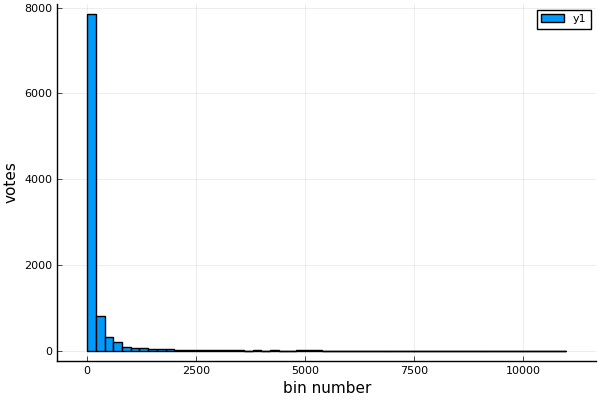

In [125]:
gh = histogram(zomatodf.Votes,nbins=50,colorbar=true)
xaxis!(gh,"bin number")
yaxis!(gh,"votes")

### 4.2 Finding the 3 best restaurants in a country by price range 

Write a function called best that takes two arguments: a 3-character country code of a country and a price range (numbers 1,2,3,4). The function should read the zomato.csv file and return a data frame with the names of the restaurant and the city that have the 3 best (i.e. highest) ranking for a price range in that country. There are 4 price range levels. Countries that do not have data on a particular price range should be excluded from the set of restaurants when deciding the rankings. 
Handling ties. If there is a tie for the best restaurant for a given price range, then the restaurant names should be sorted in alphabetical order.
The function should use the following template. 

```julia
Function best(country, pricerange)
        ## Read zomato data
        ## Check that country and price range are valid
        ## Return restaurant name in that state with highest ranking
end
```

The function should check the validity of its arguments. If an invalid country value is passed to best, the function should throw an error via the stop function with the exact message “invalid country”. If an invalid price range value is passed to best, the function should throw an error via the stop function with the exact message “invalid price range”. 
Here is some sample output from the function (WARNING: we will run different tests and the results shown here might not actually be correct)

```julia
julia> best("USA", 1)
3 rows × 2 columns

  Restaurant Name       City                  
  String                  String                 
1 Oakwood Cafe            Dalton                
2 Rae's Coastal Cafe      Augusta               
3 Shorts Burger and Shine Cedar Rapids/Iowa City

julia> best("IND", 3)
3 rows × 2 columns
  Restaurant Name         City   
  String                  String                 
1 AB's - Absolute Barbecues Chennai
2 Sagar Gaire Fast Food     Bhopal 
3 Sheroes Hangout           Agra

julia> best("TGH", 4)
Error in best("TGH", 4): invalid country

julia> best("BRA", 5)
Error in best("BRA", 5) : invalid price range
```

In [171]:
?sort!

search: sort! partialsort! sortperm! partialsortperm! setproperty! sort sortperm



```
sort!(v; alg::Algorithm=defalg(v), lt=isless, by=identity, rev::Bool=false, order::Ordering=Forward)
```

Sort the vector `v` in place. [`QuickSort`](@ref) is used by default for numeric arrays while [`MergeSort`](@ref) is used for other arrays. You can specify an algorithm to use via the `alg` keyword (see [Sorting Algorithms](@ref) for available algorithms). The `by` keyword lets you provide a function that will be applied to each element before comparison; the `lt` keyword allows providing a custom "less than" function; use `rev=true` to reverse the sorting order. These options are independent and can be used together in all possible combinations: if both `by` and `lt` are specified, the `lt` function is applied to the result of the `by` function; `rev=true` reverses whatever ordering specified via the `by` and `lt` keywords.

# Examples

```jldoctest
julia> v = [3, 1, 2]; sort!(v); v
3-element Array{Int64,1}:
 1
 2
 3

julia> v = [3, 1, 2]; sort!(v, rev = true); v
3-element Array{Int64,1}:
 3
 2
 1

julia> v = [(1, "c"), (3, "a"), (2, "b")]; sort!(v, by = x -> x[1]); v
3-element Array{Tuple{Int64,String},1}:
 (1, "c")
 (2, "b")
 (3, "a")

julia> v = [(1, "c"), (3, "a"), (2, "b")]; sort!(v, by = x -> x[2]); v
3-element Array{Tuple{Int64,String},1}:
 (3, "a")
 (2, "b")
 (1, "c")
```

---

```
sort!(A; dims::Integer, alg::Algorithm=defalg(A), lt=isless, by=identity, rev::Bool=false, order::Ordering=Forward)
```

Sort the multidimensional array `A` along dimension `dims`. See [`sort!`](@ref) for a description of possible keyword arguments.

To sort slices of an array, refer to [`sortslices`](@ref).

!!! compat "Julia 1.1"
    This function requires at least Julia 1.1.


# Examples

```jldoctest
julia> A = [4 3; 1 2]
2×2 Array{Int64,2}:
 4  3
 1  2

julia> sort!(A, dims = 1); A
2×2 Array{Int64,2}:
 1  2
 4  3

julia> sort!(A, dims = 2); A
2×2 Array{Int64,2}:
 1  2
 3  4
```

---

```
sort!(df::AbstractDataFrame, cols;
      alg::Union{Algorithm, Nothing}=nothing, lt=isless, by=identity,
      rev::Bool=false, order::Ordering=Forward)
```

Sort data frame `df` by column(s) `cols`.

`cols` can be any column selector (`Symbol`, string or integer; `:`, `All`, `Between`, `Not`, a regular expression, or a vector of `Symbol`s, strings or integers).

If `alg` is `nothing` (the default), the most appropriate algorithm is chosen automatically among `TimSort`, `MergeSort` and `RadixSort` depending on the type of the sorting columns and on the number of rows in `df`. If `rev` is `true`, reverse sorting is performed. To enable reverse sorting only for some columns, pass `order(c, rev=true)` in `cols`, with `c` the corresponding column index (see example below). See other methods for a description of other keyword arguments.

# Examples

```jldoctest
julia> df = DataFrame(x = [3, 1, 2, 1], y = ["b", "c", "a", "b"])
4×2 DataFrame
│ Row │ x     │ y      │
│     │ Int64 │ String │
├─────┼───────┼────────┤
│ 1   │ 3     │ b      │
│ 2   │ 1     │ c      │
│ 3   │ 2     │ a      │
│ 4   │ 1     │ b      │

julia> sort!(df, :x)
4×2 DataFrame
│ Row │ x     │ y      │
│     │ Int64 │ String │
├─────┼───────┼────────┤
│ 1   │ 1     │ c      │
│ 2   │ 1     │ b      │
│ 3   │ 2     │ a      │
│ 4   │ 3     │ b      │

julia> sort!(df, [:x, :y])
4×2 DataFrame
│ Row │ x     │ y      │
│     │ Int64 │ String │
├─────┼───────┼────────┤
│ 1   │ 1     │ b      │
│ 2   │ 1     │ c      │
│ 3   │ 2     │ a      │
│ 4   │ 3     │ b      │

julia> sort!(df, [:x, :y], rev=true)
4×2 DataFrame
│ Row │ x     │ y      │
│     │ Int64 │ String │
├─────┼───────┼────────┤
│ 1   │ 3     │ b      │
│ 2   │ 2     │ a      │
│ 3   │ 1     │ c      │
│ 4   │ 1     │ b      │

julia> sort!(df, (:x, order(:y, rev=true)))
4×2 DataFrame
│ Row │ x     │ y      │
│     │ Int64 │ String │
├─────┼───────┼────────┤
│ 1   │ 1     │ c      │
│ 2   │ 1     │ b      │
│ 3   │ 2     │ a      │
│ 4   │ 3     │ b      │
```


In [192]:
zomatodfgbycc = DataFrame(groupby(zomatodf, "Country Code")[(162,)])
sort!(zomatodfgbycc,18,rev=true)
DataFrame(Restaurant_Name=zomatodfgbycc["Restaurant Name"][1:3],City=zomatodfgbycc["City"][1:3],Aggregate_rating=zomatodfgbycc["Aggregate rating"][1:3])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[192]:3
└ @ Core In[192]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[192]:3
└ @ Core In[192]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[192]:3
└ @ Core In[192]:3


,Restaurant_Name,City,Aggregate_rating
,String,String,Float64
1,Ooma,Mandaluyong City,4.9
2,Spiral - Sofitel Philippine Plaza Manila,Pasay City,4.9
3,Silantro Fil-Mex,Pasig City,4.9


In [252]:
function best(country, pricerange)
    if country in ccodedf["3lettercode"]
        ccoderow=indexin([country], ccodedf["3lettercode"])
        ccodeint=ccodedf["Country Code"][ccoderow][1]

        if ccodeint in unique(zomatodf["Country Code"])
            gbycc = DataFrame(groupby(zomatodf, "Country Code")[(ccodeint,)])
            if pricerange in unique(zomatodf["Price range"])
                sort!(gbycc,18,rev=true);
 #               sort!(gbycc,2,rev=false);
                result=DataFrame(Restaurant_Name=gbycc["Restaurant Name"][1:3],City=gbycc["City"][1:3],Aggregate_rating=gbycc["Aggregate rating"][1:3])
                sort!(result,1)
                return result
            else
                print("Error in best($country, $pricerange): invalid price range")
                return 1
            end
                
            
            
        else 
            print("Error in best($country, $pricerange): invalid country(country not in zomato)")
            return 1
        end
            
    else
        print("Error in best($country, $pricerange): invalid country")
        return 1
            
    end
        ## Check that country and price range are valid
        ## Return restaurant name in that state with highest ranking

end

best (generic function with 1 method)

In [253]:
ccodedf = CSV.read("Country-Code.csv", header=true)
zomatodf = CSV.read("zomato.csv", header=true);

In [254]:
"IND" in ccodedf["3lettercode"]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[254]:1
└ @ Core In[254]:1


true

# testing
```julia
julia> best("USA", 1)
3 rows × 2 columns

  Restaurant Name       City                  
  String                  String                 
1 Oakwood Cafe            Dalton                
2 Rae's Coastal Cafe      Augusta               
3 Shorts Burger and Shine Cedar Rapids/Iowa City

julia> best("IND", 3)
3 rows × 2 columns
  Restaurant Name         City   
  String                  String                 
1 AB's - Absolute Barbecues Chennai
2 Sagar Gaire Fast Food     Bhopal 
3 Sheroes Hangout           Agra

julia> best("TGH", 4)
Error in best("TGH", 4): invalid country

julia> best("BRA", 5)
Error in best("BRA", 5) : invalid price range
```

In [255]:
best("IND", 3)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = best(::String, ::Int64) at In[252]:2
└ @ Main .\In[252]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = best(::String, ::Int64) at In[252]:3
└ @ Main .\In[252]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = best(::String, ::Int64) at In[252]:4
└ @ Main .\In[252]:4
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = best(::String, ::Int64) at In[252]:6
└ @ Main .\In[252]:6
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = best(::String, ::Int64) at In[252]:8
└ @ Main .\In[252]:8
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = best(::S

,Restaurant_Name,City,Aggregate_rating
,String,String,Float64
1,AB's - Absolute Barbecues,Chennai,4.9
2,Sagar Gaire Fast Food,Bhopal,4.9
3,Sheroes Hangout,Agra,4.9


In [257]:
best("USA", 1)

,Restaurant_Name,City,Aggregate_rating
,String,String,Float64
1,Oakwood Cafe,Dalton,4.9
2,Rae's Coastal Cafe,Augusta,4.9
3,Shorts Burger and Shine,Cedar Rapids/Iowa City,4.9


In [258]:
best("TGH", 4)

Error in best(TGH, 4): invalid country

1

In [259]:
best("BRA", 5)

Error in best(BRA, 5): invalid price range

1